# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
cities

['mataura',
 'tautira',
 'cockburn town',
 'miri',
 'caravelas',
 'hermanus',
 'arraial do cabo',
 'ornskoldsvik',
 'nantucket',
 'izhma',
 'san cristobal',
 'bluff',
 'nenjiang',
 'taolanaro',
 'ushuaia',
 'new norfolk',
 'kracheh',
 'thompson',
 'teya',
 'changji',
 'biharamulo',
 'rikitea',
 'recreio',
 'barrow',
 'balabac',
 'kapaa',
 'puerto ayora',
 'kupang',
 'aklavik',
 'bredasdorp',
 'moyale',
 'sola',
 'chuy',
 'kodiak',
 'abha',
 'teluknaga',
 'maraba',
 'te anau',
 'sarany',
 'mar del plata',
 'gillette',
 'grants',
 'baykit',
 'meulaboh',
 'oskemen',
 'cam pha',
 'east london',
 'carnarvon',
 'krasnoselkup',
 'reutte',
 'busselton',
 'bama',
 'lavrentiya',
 'albany',
 'walvis bay',
 'gazli',
 'lidkoping',
 'sao felix do xingu',
 'jamestown',
 'butaritari',
 'klaksvik',
 'ilulissat',
 'castro',
 'barentsburg',
 'camacari',
 'neuquen',
 'bani',
 'hobart',
 'pangnirtung',
 'kibala',
 'port alfred',
 'sampit',
 'vostok',
 'luderitz',
 'gorontalo',
 'vuktyl',
 'cherskiy',
 'sai

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
test_cities = ["los angeles","chicago","blahblahland","atlanta","london","paris","manila"]

url = "http://api.openweathermap.org/data/2.5/weather?units=imperial"

# Build query URL
query_url = url + "&appid=" + weather_api_key + "&q="

found_cities = []
cloudiness = []
country = []
datetimestamp = []
humidity = []
latitude = []
longitude = []
maxtemp = []
windspeed = []


rec = 1
set = 1

print("Beginning Data Retrieval")     
print("-----------------------------")

for city in cities:
    try:
        # Get weather data
        weather_response = requests.get(query_url+city)
        weather_json = weather_response.json()

        # Get the temperature from the response
        print(f"Processing Record {rec} of Set {set} | {city}")
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        datetimestamp.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        latitude.append(weather_json["coord"]["lat"])
        longitude.append(weather_json["coord"]["lon"])
        maxtemp.append(weather_json["main"]["temp_max"])
        windspeed.append(weather_json["wind"]["speed"])
        found_cities.append(city)
    except:
        print("City not found. Skipping...")
    
    if rec % 50 == 0:
        set += 1
        print("Please standby...")
        time.sleep(60)
    
    rec += 1
    
print("Scan Complete!")



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | tautira
Processing Record 3 of Set 1 | cockburn town
Processing Record 4 of Set 1 | miri
Processing Record 5 of Set 1 | caravelas
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | ornskoldsvik
Processing Record 9 of Set 1 | nantucket
Processing Record 10 of Set 1 | izhma
Processing Record 11 of Set 1 | san cristobal
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | nenjiang
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | kracheh
City not found. Skipping...
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | teya
Processing Record 20 of Set 1 | changji
Processing Record 21 of Set 1 | biharamulo
Processing Record 22 of Set

Processing Record 190 of Set 4 | orcopampa
Processing Record 191 of Set 4 | jalu
Processing Record 192 of Set 4 | saint george
Processing Record 193 of Set 4 | esperance
Processing Record 194 of Set 4 | hithadhoo
Processing Record 195 of Set 4 | port hedland
Processing Record 196 of Set 4 | kalmunai
Processing Record 197 of Set 4 | dikson
Processing Record 198 of Set 4 | coquimbo
Processing Record 199 of Set 4 | rio grande
Processing Record 200 of Set 4 | puerto escondido
Please standby...
Processing Record 201 of Set 5 | victoria
Processing Record 202 of Set 5 | ambilobe
Processing Record 203 of Set 5 | huarmey
Processing Record 204 of Set 5 | mayya
Processing Record 205 of Set 5 | yazman
Processing Record 206 of Set 5 | vardo
Processing Record 207 of Set 5 | verkhovazhye
Processing Record 208 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 209 of Set 5 | hay river
Processing Record 210 of Set 5 | chino valley
Processing Record 211 of Set 5 | veraval
Processing Recor

Processing Record 373 of Set 8 | prien
Processing Record 374 of Set 8 | henties bay
Processing Record 375 of Set 8 | alice springs
Processing Record 376 of Set 8 | chakulia
Processing Record 377 of Set 8 | quimper
Processing Record 378 of Set 8 | itupiranga
Processing Record 379 of Set 8 | kavaratti
Processing Record 380 of Set 8 | rangapara
Processing Record 381 of Set 8 | lichinga
Processing Record 382 of Set 8 | natal
Processing Record 383 of Set 8 | ponta delgada
Processing Record 384 of Set 8 | rungata
City not found. Skipping...
Processing Record 385 of Set 8 | narasannapeta
Processing Record 386 of Set 8 | mayo
Processing Record 387 of Set 8 | saint-denis
Processing Record 388 of Set 8 | lat yao
Processing Record 389 of Set 8 | olinda
Processing Record 390 of Set 8 | namie
Processing Record 391 of Set 8 | biritiba-mirim
Processing Record 392 of Set 8 | hofn
Processing Record 393 of Set 8 | marcona
City not found. Skipping...
Processing Record 394 of Set 8 | yeppoon
Processing Re

Processing Record 556 of Set 12 | gushikawa
Processing Record 557 of Set 12 | los llanos de aridane
Processing Record 558 of Set 12 | sarai naurang
Processing Record 559 of Set 12 | grenaa
Processing Record 560 of Set 12 | miramar
Processing Record 561 of Set 12 | general roca
Processing Record 562 of Set 12 | centralia
Processing Record 563 of Set 12 | plettenberg bay
Processing Record 564 of Set 12 | baruun-urt
Processing Record 565 of Set 12 | savona
Processing Record 566 of Set 12 | alice
Processing Record 567 of Set 12 | maldonado
Processing Record 568 of Set 12 | shaowu
Processing Record 569 of Set 12 | kailua
Processing Record 570 of Set 12 | boguchany
Processing Record 571 of Set 12 | griffith
Processing Record 572 of Set 12 | lumphat
Processing Record 573 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 574 of Set 12 | mata
Processing Record 575 of Set 12 | churachandpur
Processing Record 576 of Set 12 | paita
Processing Record 577 of Set 12 | minab
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": found_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": datetimestamp,
    "Humidity": humidity,
    "Lat" : latitude,
    "Lng" : longitude,
    "Max Temp" : maxtemp,
    "Wind Speed": windspeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)

In [6]:
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mataura,100,NZ,1586643300,65,-46.19,168.86,57.99,4.00
1,tautira,100,PF,1586643300,66,-17.73,-149.15,87.80,3.36
2,cockburn town,0,TC,1586643300,69,21.46,-71.14,80.69,10.11
3,miri,75,MY,1586643300,100,4.41,114.01,77.00,2.24
4,caravelas,62,BR,1586643300,85,-17.71,-39.25,79.21,11.05
...,...,...,...,...,...,...,...,...,...
568,oistins,40,BB,1586644010,69,13.07,-59.53,80.60,12.75
569,kashi,98,CN,1586643941,18,39.45,75.98,59.00,4.47
570,ostrovnoy,51,RU,1586643625,93,68.05,39.51,15.75,11.48
571,longyearbyen,20,SJ,1586643981,76,78.22,15.64,-7.60,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

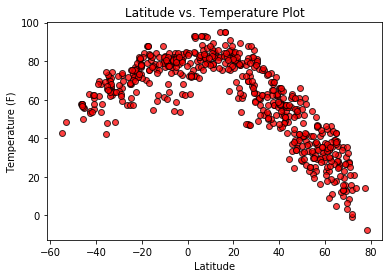

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("output_data/" + "LatitudeVsTemperaturePlot" + ".png")

Maximum Temperature tends to be at its highest as you near the Equator. Temperature ranges are greater in the Northern Hemisphere as you move away from the Equator

#### Latitude vs. Humidity Plot

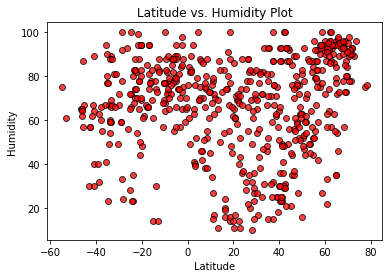

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/" + "LatitudeVsHumidityPlot" + ".png")

Latitude has no apparent correlation with Humidity.  However, since 60% tends to be a baseline for these cities, geography and its surronding areas (bodies of water) will need to be further investigated.

#### Latitude vs. Cloudiness Plot

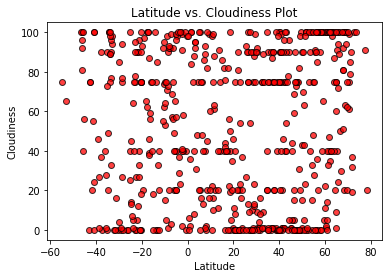

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/" + "LatitudeVsCloudinessPlot" + ".png")

Cloudiness appears to be independent of latitude.

#### Latitude vs. Wind Speed Plot

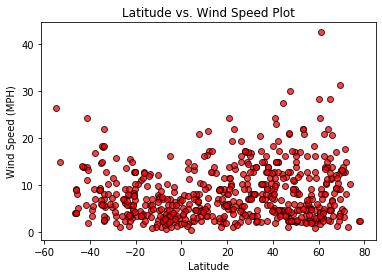

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("output_data/" + "LatitudeVsWindSpeedPlot" + ".png")

There is no correlation between latitude and wind speed. Most city wind speeds tend to fall between 0-10mph.

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x_values, y_values, xlabel, ylabel,linex,liney,output_file):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(linex,liney),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig("output_data/" + output_file + ".png")
    plt.show()
    

In [23]:
# Create Northern and Southern Hemisphere DataFrames
nhemi = weather_data.loc[weather_data["Lat"] >= 0, :]
shemi = weather_data.loc[weather_data["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8105660893950639


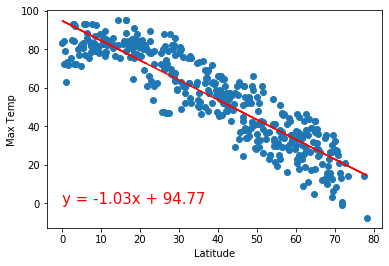

In [24]:
linear_regression(nhemi['Lat'],nhemi['Max Temp'],"Latitude","Max Temp",0,0,"NHMaxTempVsLatitude")

In the Northern Hemisphere, there is a negative correlation between Max Temperatue and Distance from the Equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.430600301047668


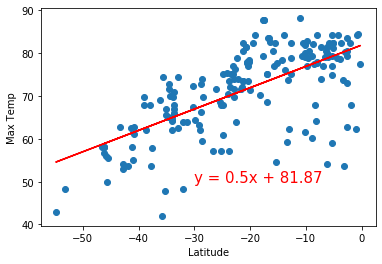

In [25]:
linear_regression(shemi['Lat'],shemi['Max Temp'],"Latitude","Max Temp",-30,50,"SHMaxTempVsLatitude")

In the Southern Hemisphere, there is a positive correlation between Max Temp and Distance towards the Equator.  This correlation is not as profound as the one found in the Northern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09217749113499923


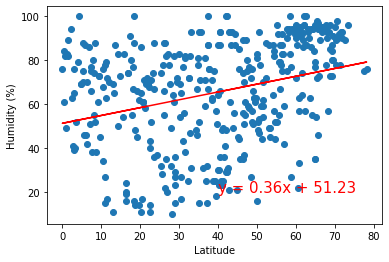

In [26]:
linear_regression(nhemi['Lat'],nhemi['Humidity'],"Latitude","Humidity (%)",40,20,"NHHumidityVsLatitude")

Low R^2 and Beta show there is no recognizable correlation between Humidity and Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.082139335001929


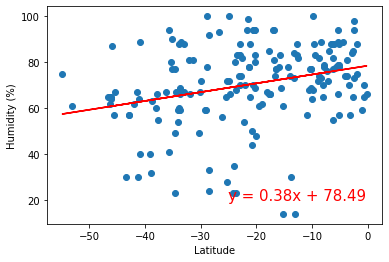

In [27]:
linear_regression(shemi['Lat'],shemi['Humidity'],"Latitude","Humidity (%)",-25,20,"SHHumidityVsLatitude")

Low R^2 and Beta show there is no recognizable correlation between Humidity and Latitude in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0366360151497763


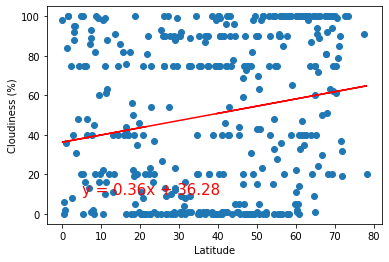

In [28]:
linear_regression(nhemi['Lat'],nhemi['Cloudiness'],"Latitude","Cloudiness (%)",5,10,"NHCloudinessVsLatitude")

Low R^2 and Beta show there is no recognizable correlation between Cloudiness and Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00013859288332869685


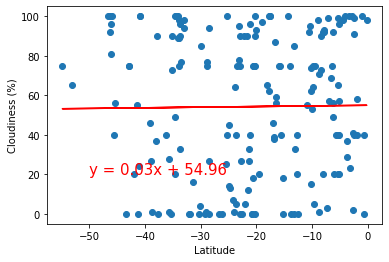

In [29]:
linear_regression(shemi['Lat'],shemi['Cloudiness'],"Latitude","Cloudiness (%)",-50,20,"SHCloudinessVsLatitude")

Low R^2 and Beta show there is no recognizable correlation between Cloudiness and Latitude in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008723660374800744


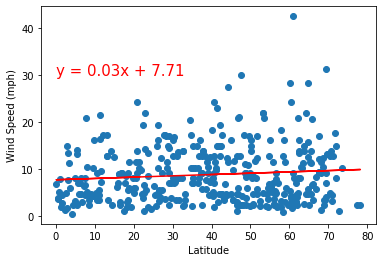

In [30]:
linear_regression(nhemi['Lat'],nhemi['Wind Speed'],"Latitude","Wind Speed (mph)",0,30,"NHWindSpeedVsLatitude")

Low R^2 and Beta show there is no recognizable correlation between Wind Speed and Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16216735515211886


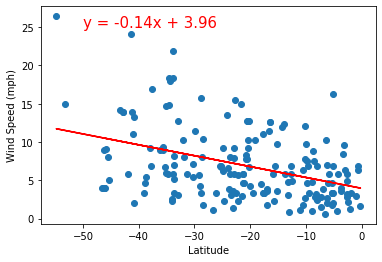

In [31]:
linear_regression(shemi['Lat'],shemi['Wind Speed'],"Latitude","Wind Speed (mph)",-50,25,"SHWindSpeedVsLatitude")

Low R^2 and Beta show there is no recognizable correlation between Wind Speed and Latitude in the Southern Hemisphere.

# Observable Trends
1. Max Temperatures tend to be higher toward the Equator
2. THe range of temperatures as move away from Equator is more profound in the Northern Hemisphere
3. Most cities have a humidity around 60% suggesting there may be other factors such as nearby bodies of water that are more highly correlated to humidity
4. Wind speeds for cities tend to fall under 10 mph.
5. Latitude does not correlate with humidity, cloudiness, or wind speed.